# Pediction of Survival on the TITANIC Using Logistic Regression

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to visualize plot in notebook
%matplotlib inline

In [2]:
train_data = pd.read_csv('Titanic_train_data.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Checking for total missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

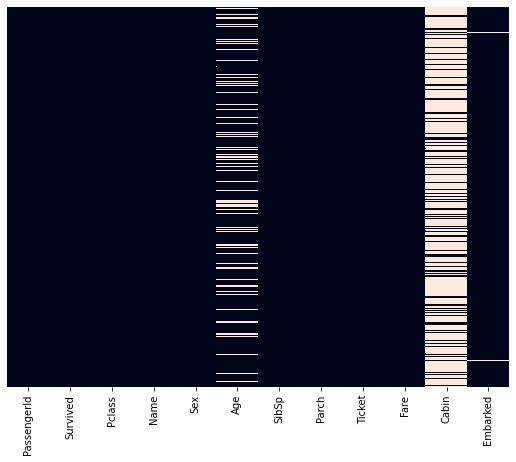

In [5]:
# Using heatmap to visualize it more
plt.figure(figsize=(9,7))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [6]:
# from the heatmap above, it looks like some values are missing in the age column. and just one in the embarked column
# We can use knowledge from other columns to fed reasonable information on a the missing columns
# But firstly lets visualize more on the data first.

In [7]:
sns.set_style('whitegrid') #setting seaborn style

## Checking for survivors and non survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

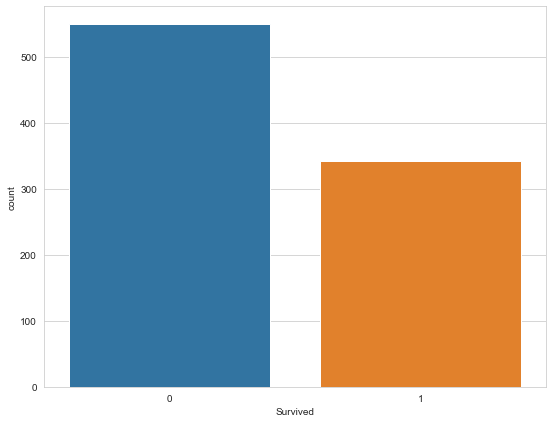

In [8]:
# Checking for rate of survivors and non survivors 
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

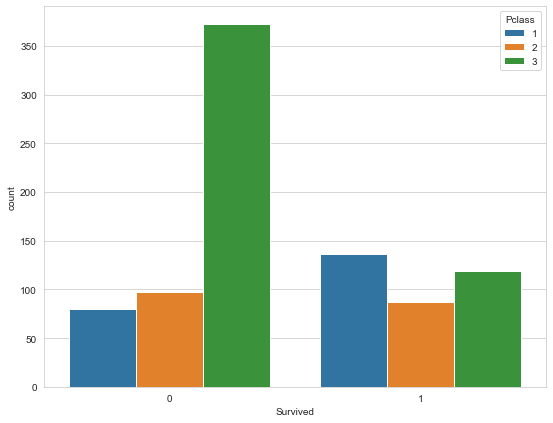

In [9]:
# Checking for rate of survivors and non survivors (VIA PASSENGERS CLASS)
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, hue='Pclass', x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

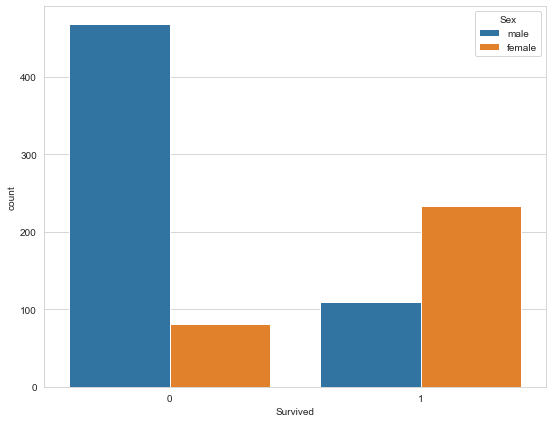

In [10]:
# Checking for rate of survivors and non survivors (VIA SEX)
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, hue='Sex', x='Survived')

## Checking age of people on board the titanic

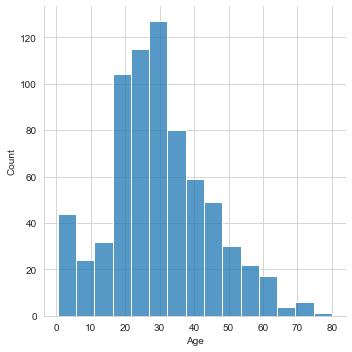

In [11]:
sns.displot(train_data['Age'].dropna(), bins=15) 
# The age column has 177 missing values, so i drop to get a clean distribution plot

## Exploring spouses or siblings on board the titanic

Text(0.5, 0, 'Siblings and Spouses')

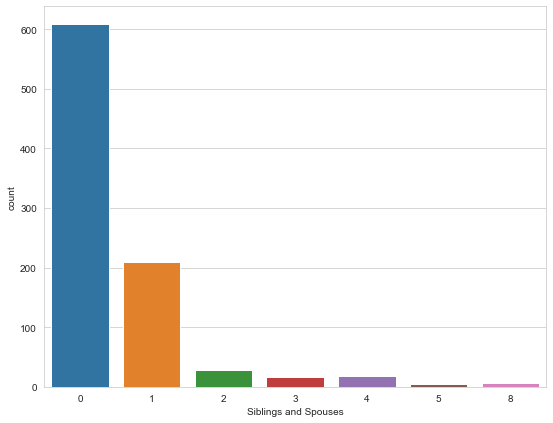

In [12]:
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, x='SibSp')
plt.xlabel('Siblings and Spouses')

Text(0.5, 0, 'Siblings and Spouses(What class has most of the siblings/spouses)')

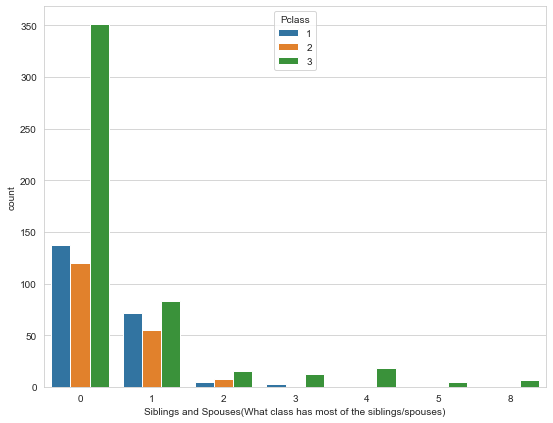

In [13]:
plt.figure(figsize=(9,7))
sns.countplot(data=train_data, x='SibSp', hue='Pclass')
plt.xlabel('Siblings and Spouses(What class has most of the siblings/spouses)')

## Checking payment

<AxesSubplot:xlabel='Fare', ylabel='Count'>

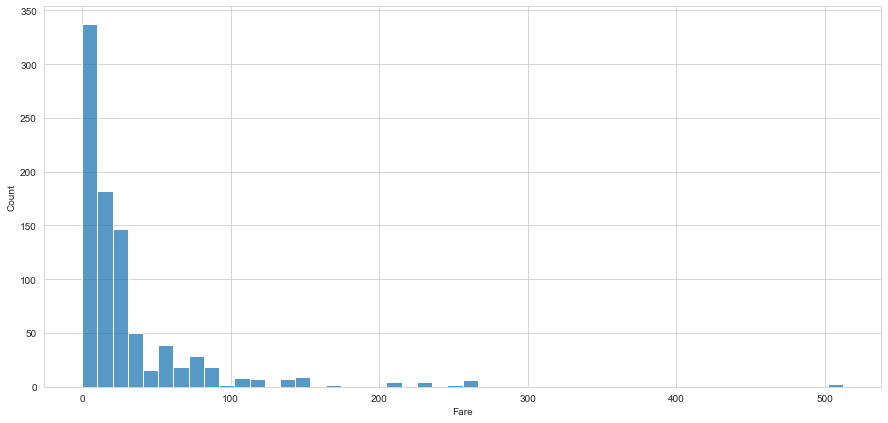

In [14]:
plt.figure(figsize=(15,7))
sns.histplot(train_data.Fare, bins=50)

Text(0.5, 0, 'Passenger Class')

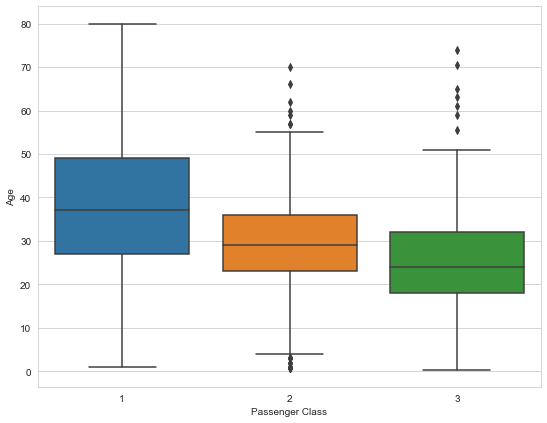

In [15]:
# checking for age means with Passenger Class
plt.figure(figsize=(9,7))
sns.boxplot(data=train_data, y='Age', x='Pclass')
plt.xlabel('Passenger Class')

## Dealing with missing values

In [16]:
# getting the mean values of age by the Passenger Class
train_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
# Creating function to fill the Average of age in respect to the Pclass column to the age missing values
def Fill_age(inp):
    Pass_Class = inp[0]
    Age = inp[1]
    
    #filling function
    if pd.isnull(Age):
        if Pass_Class == 1:
            return 38.233441
        elif Pass_Class == 2:
            return 29.877630
        elif Pass_Class == 3:
            return 25.140620
    else:
        return Age

In [18]:
# Applying the fill function
train_data['Age'] = train_data[['Pclass','Age']].apply(Fill_age, axis=1)

<AxesSubplot:>

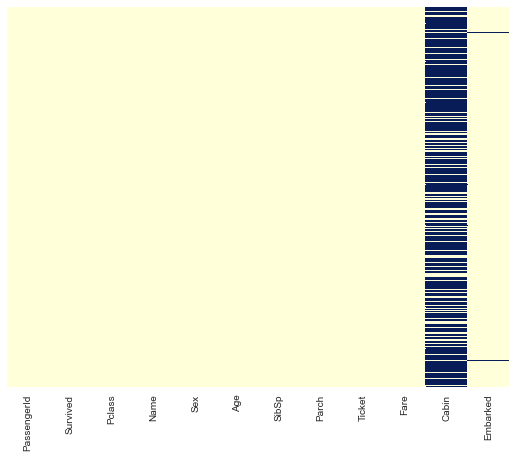

In [19]:
# Checking for the Now missing values in the data using heatmap
plt.figure(figsize=(9,7))
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap='YlGnBu')

In [20]:
# From the the above map, it appears we have no missing  values on the Age column.
# However on the Embarked column, we have 2, and we have so much on the Cabin column that it will make sense we drop it.
train_data.drop('Cabin', inplace=True, axis=1)

In [21]:
# Checking to see the drop effect
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [22]:
# and since we have about just two mising values in the Embarked column, let do it a forward fill (Categorical data)
train_data.fillna('Embarked',inplace=True)

<AxesSubplot:>

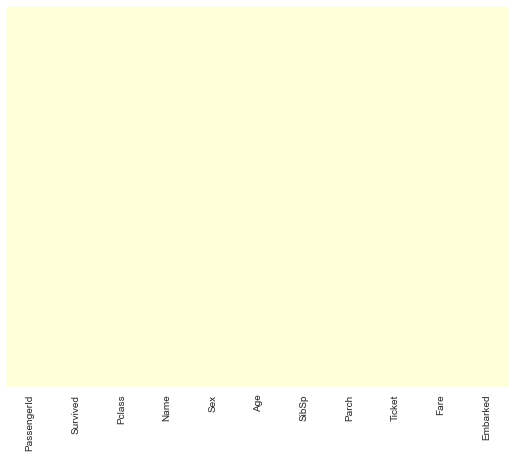

In [23]:
# Confirming the missing values fill
plt.figure(figsize=(9,7))
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap='YlGnBu')

In [24]:
# It appears we have not missing values, but lets futher confirm
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Dropping non needed columns

In [25]:
train_data.drop(['Name','PassengerId','Ticket'], inplace=True, axis=1)

In [26]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


## Handling Categorical Data

In [27]:
y = train_data['Survived']
x = train_data.drop('Survived', axis=1)

In [28]:
train_data.value_counts('Embarked')

Embarked
S           644
C           168
Q            77
Embarked      2
dtype: int64

In [29]:
X = pd.get_dummies(x,drop_first=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Embarked,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


## Splitting and Training the Model

In [30]:
# importing the sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [32]:
Model = LogisticRegression(max_iter=2000)

In [33]:
Model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [34]:
predict = Model.predict(X_test)
predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [35]:
Model.score(X_test, y_test)

0.8283582089552238

In [36]:
print(f'{confusion_matrix(y_test, predict)} \n')
print(classification_report(y_test, predict))

[[152  26]
 [ 20  70]] 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



# Working with the Test Dataset

In [37]:
test_data = pd.read_csv('Titanic_test_data.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [39]:
# From the train data we didnt use some columns, so lets drop them
test_data.drop(['Name','Cabin','PassengerId','Ticket'], inplace=True, axis=1)
test_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [40]:
# Checking for null values
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

<AxesSubplot:>

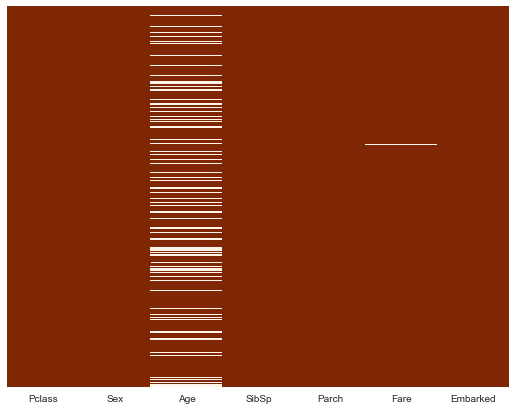

In [41]:
# Visualizing the missing values with heatmap
plt.figure(figsize=(9,7))
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False, cmap='Oranges_r')

**Filling in the missing values**

In [42]:
# getting the average of the data in respect to the passenger class
test_data.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [43]:
# using a similar funtion to handle this missing values too
def missing_age_test(inp):
    Pass_Class = inp[0]
    Age = inp[1]
    
    if pd.isnull(Age):
        if Pass_Class == 1:
            return 40.918367
        elif Pass_Class == 2:
            return 28.777500
        elif Pass_Class == 3:
            return 24.027945
    else:
        return Age

In [44]:
# applying the funtion
test_data['Age'] = test_data[['Pclass', 'Age']].apply(missing_age_test, axis=1)

<AxesSubplot:>

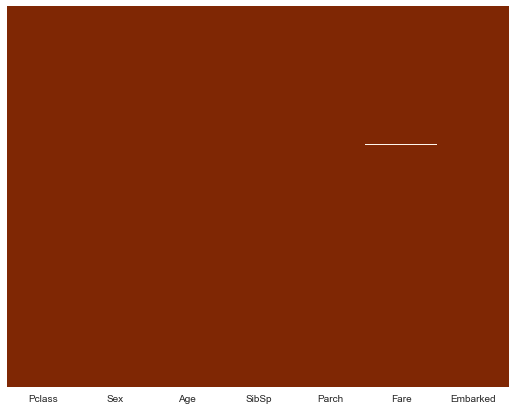

In [45]:
# Recheking for the missing values
plt.figure(figsize=(9,7))
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False, cmap='Oranges_r')

In [46]:
# for the Fare having 1 missing value, lets use a forward fill to fill that in
test_data.fillna('Fare', axis=1, inplace=True)

<AxesSubplot:>

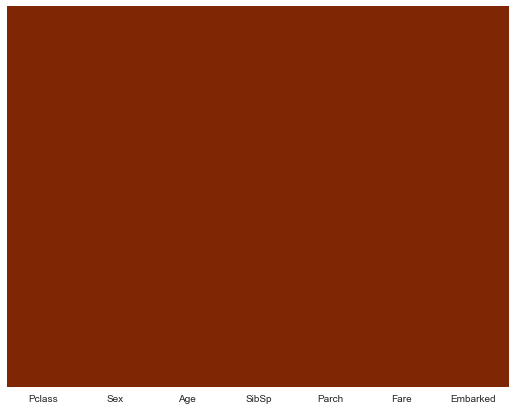

In [47]:
plt.figure(figsize=(9,7))
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False, cmap='Oranges_r')

### Handling Categorical Data

In [48]:
# We have gotten rid of all missing values, now lets categorical data
# Rechecking the head
test_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0,S
2,2,male,62.0,0,0,9.6875,Q


In [49]:
test_data.value_counts('Fare')

Fare
7.75       21
26.0       19
8.05       17
13.0       17
10.5       11
           ..
27.75       1
27.4458     1
12.7375     1
12.875      1
Fare        1
Length: 170, dtype: int64

In [50]:
# dropping the Fare row under the Fare column to avoid categorical error
test_data.drop(test_data[test_data['Fare'] == 'Fare'].index, inplace=True)
test_data[test_data['Fare'] == 'Fare']

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [51]:
Sex = pd.get_dummies(test_data['Sex'], drop_first=True)
Embarked = pd.get_dummies(test_data['Embarked'], drop_first=True)

In [52]:
test_data.drop(['Sex','Embarked'], inplace=True ,axis=1)

In [53]:
test_data.head(2)

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0


In [54]:
clean_test = pd.concat([test_data,Sex,Embarked], axis=1)

In [55]:
clean_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Embarked,Q,S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0


## Entire Classification Report & Score

In [56]:
# recall that the X carries our entire data and the y carries our entire survived data
X_main = X
y_main = y

In [57]:
Model_main = LogisticRegression(max_iter=2000)

In [58]:
Model_main.fit(X_main,y_main)

LogisticRegression(max_iter=2000)

In [59]:
Train_predict = Model_main.predict(X_main)

In [60]:
Test_Predict = Model_main.predict(clean_test)

In [61]:
#Test_Predict

In [62]:
#Train_predict

In [63]:
# Making a combined dataset
y_conbined = pd.concat([y_main, pd.Series(Test_Predict, name='Survived')], axis=0).reset_index(drop=True)

In [64]:
Conbined_predictions = pd.concat([pd.Series(Train_predict), pd.Series(Test_Predict)], axis=0).reset_index(drop=True)

### Former Classification Report & Confusion Matrix

In [65]:
print(f'{confusion_matrix(y_test, predict)} \n')
print(classification_report(y_test, predict))

[[152  26]
 [ 20  70]] 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



### Overall Classification Report & Confusion Matrix

In [66]:
print(f'{confusion_matrix(y_conbined, Conbined_predictions)} \n')
print(classification_report(y_conbined, Conbined_predictions))

[[737  74]
 [100 397]] 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       811
           1       0.84      0.80      0.82       497

    accuracy                           0.87      1308
   macro avg       0.86      0.85      0.86      1308
weighted avg       0.87      0.87      0.87      1308



## The overall Classification of the entire train data and that of the original test data appears to be better than the test and splitted data.